## Imagenet Plot

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# in_list = deephoyer_comp
def comp_to_sps(in_list):
    sps = 100 - (1/np.array(in_list) * 100)
    sps = list(sps)
    return sps

# comp_to_sps(in_list)
comp_to_sps([5])

[80.0]

In [5]:
Res50Param = 25636712
Res50Param

25636712

In [9]:
gsp_acc = [75.284, 73.72, 73.5]
gsp_acc_dr = list(75.70 - np.array(gsp_acc))
gsp_sps = [70, 85, 90]

In [45]:
# DeepHoyer Imagenet
deephoyer_acc = [75.20, 73.19, 71.08]
deephoyer_acc_dr = list(76.15 - np.array(deephoyer_acc))
deephoyer_comp = [3.09, 4.68, 5.48]
deephoyer_sps = comp_to_sps(deephoyer_comp)
# deephoyer_sps

In [12]:
# SNIP
snip_acc = [73.95, 69.67, 61.97]
snip_acc_dr = list(75.70 - np.array(snip_acc))
snip_sps = [60, 80, 90]

In [13]:
#GraSP
grasp_acc = [74.02, 72.06, 68.14]
grasp_acc_dr = list(75.70 - np.array(grasp_acc))
grasp_sps = [60, 80, 90]

In [11]:
# Data Driven Sparse NN Huang 2018


In [46]:
# Magnitude
mag_acc = [71.7, 66.7]
mag_acc_dr = list(75.70 - np.array(mag_acc))
mag_sps = [78.5, 89.3]

In [47]:
# ThiNet A Filter Level Pruning Method for Deep Neural Network Compression
thinet_acc = [72.04, 71.01, 68.42]
thinet_acc_dr =  list(72.88- np.array(thinet_acc))
thinet_comp = [1.58, 2.26, 3.51]
thinet_sps = list( (1 - np.array([16.94, 12.38, 8.66]) / 25.56 ) * 100)
thinet_sps

[33.72456964006258, 51.56494522691706, 66.1189358372457]

In [48]:
# SYNFLOW
synflow_acc = [72, 70.8, 68]
synflow_acc_dr =  list(76.80- np.array(synflow_acc))
synflow_comp = ''
synflow_sps = [78.5, 83.2, 89.3 ]
synflow_sps


[78.5, 83.2, 89.3]

In [49]:
# NISP Filter Pruning
nisp_acc = [(75.88-0.21), (72.88-0.89)] #These numbers are not accurate
nisp_acc_dr = [0.21, 0.89]
nisp_sps = [27.12, 43.82]

In [70]:
# AMC: AutoML for Model Compression and Acceleration on Mobile Devices (He et all 2018)
amc_acc = [76.11]
amc_acc_dr = [1.06]
amc_sps = [80.0]

In [71]:
# Discrimination-aware Channel Pruning for Deep Neural Networks (Zhuang et al 2018)
dcp_acc = [72.88]
dcp_acc_dr = [1.06]
dcp_sps = [51.4]

In [72]:
methods = ['GSP', 'SynFlow', 'Magnitude', 'DeepHoyer', 'SNIP', 'GraSP', 'ThiNet', 'AMC', 
          'NISP', 'DCP']

acc_vec = gsp_acc + synflow_acc + mag_acc + deephoyer_acc + snip_acc + grasp_acc + thinet_acc \
          + amc_acc + nisp_acc + dcp_acc
acc_dr_vec = gsp_acc_dr + synflow_acc_dr + mag_acc_dr + deephoyer_acc_dr + snip_acc_dr + \
            grasp_acc_dr + thinet_acc_dr + amc_acc_dr + nisp_acc_dr + dcp_acc_dr
neg_acc_dr_vec = [-x for x in acc_dr_vec] #Negate all the values since drop

sps_vec = gsp_sps + synflow_sps + mag_sps + deephoyer_sps + snip_sps + grasp_sps + thinet_sps \
          + amc_sps + nisp_sps + dcp_sps

len_data = [len(gsp_acc), len(synflow_acc), len(mag_acc), len(deephoyer_acc), len(snip_acc), 
          len(grasp_acc), len(thinet_acc), len(amc_acc), len(nisp_acc), len(dcp_acc)]

methods_l = list()
for num, name in zip(len_data, methods) :
     methods_l += [name] * num 

# methods_l

In [77]:
print(len(acc_vec))
print(len(neg_acc_dr_vec))
print(len(sps_vec))
print(len(len_data))
print(len(methods_l))

24
24
24
10
24


In [78]:
imagenet = {
    'Accuracy %': acc_vec,
    'Accuracy Drop %': neg_acc_dr_vec,
    'Sparsity %': sps_vec,
    'Methods': methods_l
    }

In [79]:
df = pd.DataFrame(imagenet)
df.head()

,Accuracy %,Accuracy Drop %,Sparsity %,Methods
0,75.284,-0.416,70.0,GSP
1,73.720,-1.980,85.0,GSP
2,73.500,-2.200,90.0,GSP
3,72.000,-4.800,78.5,SynFlow
4,70.800,-6.000,83.2,SynFlow


In [61]:
plt.style.use('seaborn')

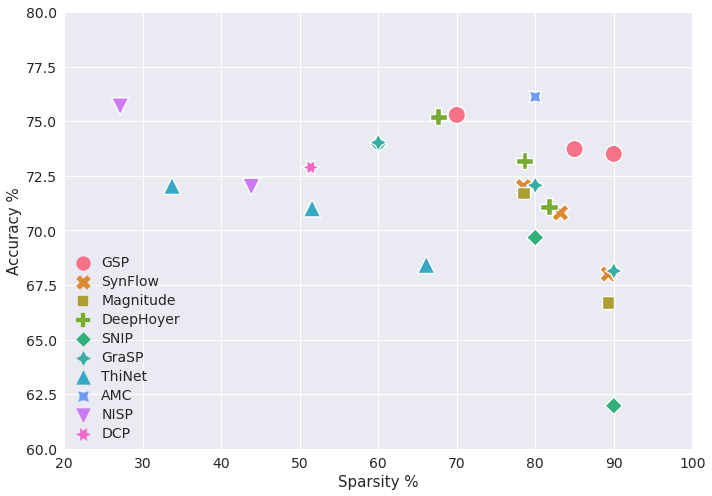

In [80]:
# plt.figure(figsize=(10,7))
fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.scatterplot(data=df, x="Sparsity %", y="Accuracy %", hue="Methods", style="Methods", 
                        s=300)
plt.grid(True)
plt.xlim([20, 100])
plt.ylim([60, 80])

ax.tick_params(axis='both', which='major', labelsize=14)

# plt.title('Accuracy vs Sparsity of GSP and Concurrent Pruning methods on Imagenet', fontsize=16)
# plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

ax.legend(loc='lower left', markerscale=2)
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text

plt.rcParams["axes.labelsize"] = 15

fig.tight_layout()
plt.savefig('imagenet.eps', format='eps')

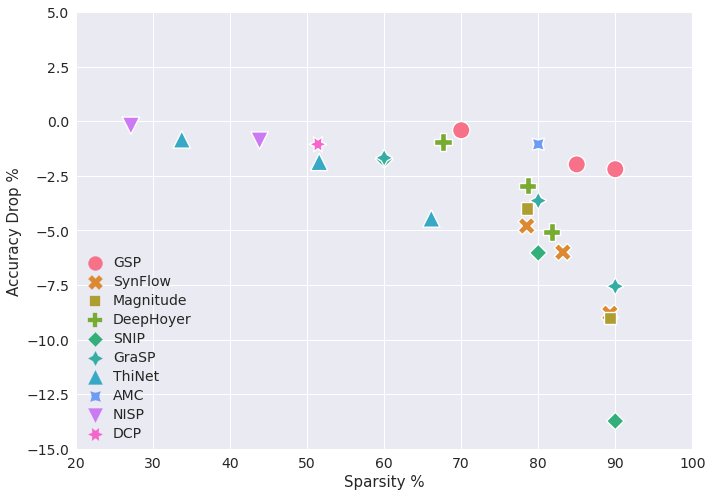

In [82]:
# plt.figure(figsize=(10,7))
fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.scatterplot(data=df, x="Sparsity %", y="Accuracy Drop %", hue="Methods", 
                     style="Methods", s=300)

plt.grid(True)
plt.xlim([20, 100])
plt.ylim([-15, 5])

ax.tick_params(axis='both', which='major', labelsize=14)

# plt.title('Accuracy vs Sparsity of GSP and Concurrent Pruning methods on Imagenet', fontsize=16)
# plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

ax.legend(loc='lower left', markerscale=2)
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text

plt.rcParams["axes.labelsize"] = 15

fig.tight_layout()
plt.savefig('imagenet_drop.eps', format='eps')